**#Proof-of-concept synthesis**

In [1]:
# Install latest version of the ORKG R package from Git
install.packages('remotes')
remotes::install_gitlab("TIBHannover/orkg/orkg-r", force=TRUE)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

from URL https://gitlab.com/api/v4/projects/38478922/repository/archive.tar.gz?sha=HEAD




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp05Q98z/remotes2d2142f34b1/orkg-r-HEAD-4296570ae50cde50c6e69c382b40adf54a61129d/DESCRIPTION’ ... OK
* preparing ‘orkg’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘orkg_0.1.0.tar.gz’



Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
# Connect with ORKG
library(orkg)
orkg <- ORKG(host='https://incubating.orkg.org/')

Loading required package: stringr

Loading required package: glue

Loading required package: jsonlite

Loading required package: sets


Attaching package: ‘sets’


The following object is masked from ‘package:stringr’:

    %>%


Loading required package: hash

hash-2.2.6.2 provided by Decision Patterns




In [3]:
#retrieve significance testing output dataset for Ricardo's fig. 4a (aphid incidence) (n=42) - here we want the p-value (need to run this code to create my test dataframe and Ricardo's dataframe, which is the one we will actually use for the meta-analysis)
PerezAlvarez2018Fig4aSigTest <- orkg$resources$by_id('R569582')$as_dataframe()
PerezAlvarez2018Fig4aSigTest 
#retrieve significance testing output dataset for Ricardo's fig. 4b (flea beetle abundance) (n=43) - here we want the p-value
PerezAlvarez2018Fig4bSigTest <- orkg$resources$by_id('R570502')$as_dataframe()
PerezAlvarez2018Fig4bSigTest
#retrieve significance testing output dataset for Ricardo's fig. 4c (incidence of lepidopteran larvae) (n=41) - here we want the p-value
PerezAlvarez2018Fig4cSigTest <- orkg$resources$by_id('R571405')$as_dataframe()
PerezAlvarez2018Fig4cSigTest
#retrieve ANOVA output dataset for Daniel's fig. 4 (Bactrocera oleae abundance) (n=25) - here we want the Pr..Chi value
Paredes2022Fig4Anova <- orkg$resources$by_id('R552440')$as_dataframe()
Paredes2022Fig4Anova

p-value t-value DF Std.Error Value 
(Intercept) 0.5768  0.5668  21 0.0791    0.0449
mead_250    0.0054  3.1029  21 0.1866    0.5791
Year2015    0       5.5384  21 0.0582    0.3225

p-value t-value DF Std.Error Value  
(Intercept) 0.3292  0.9979  22 1.1789    1.1764 
mead_250    0.0068  2.9875  22 2.7625    8.2527 
Year2015    0.5346  -0.6309 22 0.8694    -0.5485

p-value    t-value DF Std.Error Value  
(Intercept) 0          5.6991  21 0.0736    0.4192 
mead_1000   0.0361     -2.2387 21 0.2047    -0.4582
Year2015    3.1207e-06 6.2842  21 0.0425    0.2669

Pr..Chi. Resid..Dev Resid..Df Deviance Df
NULL NA       31.8955    24        NA       NA
shdi 0.035    27.4522    23        4.4433   1

In [4]:
#####CREATING A JOIN DATASET #############################

#create and merge dataframes
Perez_Fig4a<- as.data.frame(PerezAlvarez2018Fig4aSigTest)
species_Fig4a <- c("aphids", "aphids", "aphids")
Perez_Fig4a["species"] <- species_Fig4a 

Perez_Fig4b<- as.data.frame(PerezAlvarez2018Fig4bSigTest)
species_Fig4b <- c("flea beetles", "flea beetles", "flea beetles")
Perez_Fig4b["species"] <- species_Fig4b 

Perez_Fig4c<- as.data.frame(PerezAlvarez2018Fig4cSigTest)
species_Fig4c <- c("Lepidoptera", "Lepidoptera", "Lepidoptera")
Perez_Fig4c["species"] <- species_Fig4c

Perez_Fig4_Total <-rbind(Perez_Fig4a, Perez_Fig4b,Perez_Fig4c)
#remove unnecessary rows from dataframe
Perez_Fig4_Total2 <-Perez_Fig4_Total[-c(1,3, 4, 6,7,9), ]  
#add  column with direction (for the correlation)
direction_perez <- c(1, 1, -1)
Perez_Fig4_Total2["Direction"] <- direction_perez
#making sure row names are accurate
rownames(Perez_Fig4_Total2) <- c("mead_250","mead_250 (2)","mead_1000")
#add column to the entire dataframe, so we could merge this with other dataframes
study_perez <- c("Perez-Alvarez2018", "Perez-Alvarez2018", "Perez-Alvarez2018")
Perez_Fig4_Total2["Study"] <- study_perez
# removing unnecesary columns from the dataframe
names(Perez_Fig4_Total2)
Perez_total = subset(Perez_Fig4_Total2, select = -c(DF,Std.Error,Value))
#add column with type of test and sample size
stats_test_perez <- c("t-value", "t-value", "t-value")
SampleSize_perez <- c(42, 43, 41)
Perez_total["stats_test"] <- stats_test_perez
Perez_total["Sample size"] <- SampleSize_perez 

#change column names
colnames(Perez_total ) <- c('p.value','Statistic.value','species',"Direction", "Study", "stats_test_Type","Sample_size")

#Now we are going to merge Perez_total with the dataframe from Paredes study
#select relevant columns from Paredes
#names (Paredes2022Fig4Anova)

Paredes_total = subset(Paredes2022Fig4Anova, select = c(Pr..Chi.))
colnames(Paredes_total) <- c('p-value')
#Paredes_total

#create dataframe from paredes with the same column names than Perez_total
Paredes_full<- data.frame (
  p.value = 0.035,
  Statistic.value = NA,
  species= "Bactrocera oleae", 
  Direction= -1, 
  Study= "Paredes2022",
  stats_test_Type="chisqquared",
  Sample_size= 25)
#change row name
rownames(Paredes_full) <- c("shdi")

#Join Perez and paredes
MetaAnalysis_Data <-rbind(Perez_total, Paredes_full)

#This is the final dataframe that include all data
MetaAnalysis_Data

[1] "p-value"   "t-value"   "DF"        "Std.Error" "Value"     "species"  
[7] "Direction" "Study"

p.value Statistic.value species          Direction
mead_250     0.0054  3.1029          aphids            1       
mead_250 (2) 0.0068  2.9875          flea beetles      1       
mead_1000    0.0361  -2.2387         Lepidoptera      -1       
shdi         0.035   NA              Bactrocera oleae -1       
             Study             stats_test_Type Sample_size
mead_250     Perez-Alvarez2018 t-value         42         
mead_250 (2) Perez-Alvarez2018 t-value         43         
mead_1000    Perez-Alvarez2018 t-value         41         
shdi         Paredes2022       chisqquared     25

Loading 'meta' package (version 6.2-1).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs


Attaching package: ‘dplyr’


The following object is masked from ‘package:sets’:

    %>%


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




study             es        weight sample.size se        var       
1 Perez-Alvarez2018 0.4217908 39     42          0.1601282 0.02564103
2 Perez-Alvarez2018 0.4067098 40     43          0.1581139 0.02500000
3 Perez-Alvarez2018 0.3283278 38     41          0.1622214 0.02631579
  ci.lo      ci.hi     measure
1 0.13519026 0.6432593 r      
2 0.12116677 0.6300868 r      
3 0.02300061 0.5776315 r

study       es        weight   sample.size se        var        ci.lo     
1 Paredes2022 0.4216717 21.55482 25          0.2153911 0.04639333 0.02755771
  ci.hi     fishers.z ci.lo.z    ci.hi.z   measure
1 0.7023292 0.4497235 0.02756469 0.8718823 r

Review:     Mini Meta-analysis

                      COR             95%-CI %W(common) %W(random)
Perez-Alvarez2018  0.4218 [ 0.1352;  0.6433]       28.1       25.5
Perez-Alvarez2018  0.4067 [ 0.1212;  0.6301]       28.8       25.6
Perez-Alvarez2018 -0.3283 [-0.5776; -0.0230]       27.3       25.4
Paredes2022       -0.4217 [-0.7001; -0.0318]       15.8       23.5

Number of studies combined: k = 4
Number of observations: o = 151

                        COR            95%-CI  z|t p-value
Common effect model  0.0858 [-0.0800; 0.2471] 1.01  0.3103
Random effects model 0.0329 [-0.6269; 0.6652] 0.14  0.9003

Quantifying heterogeneity:
 tau^2 = 0.2023 [0.0442; 3.2358]; tau = 0.4498 [0.2102; 1.7988]
 I^2 = 87.1% [68.9%; 94.6%]; H = 2.78 [1.79; 4.31]

Test of heterogeneity:
     Q d.f.  p-value
 23.18    3 < 0.0001

Details on meta-analytical method:
- Inverse variance method
- Restricted maximum-likelihood estimator for tau^2
- Q-Profile method for confidence interval of tau^2 and tau
- Har

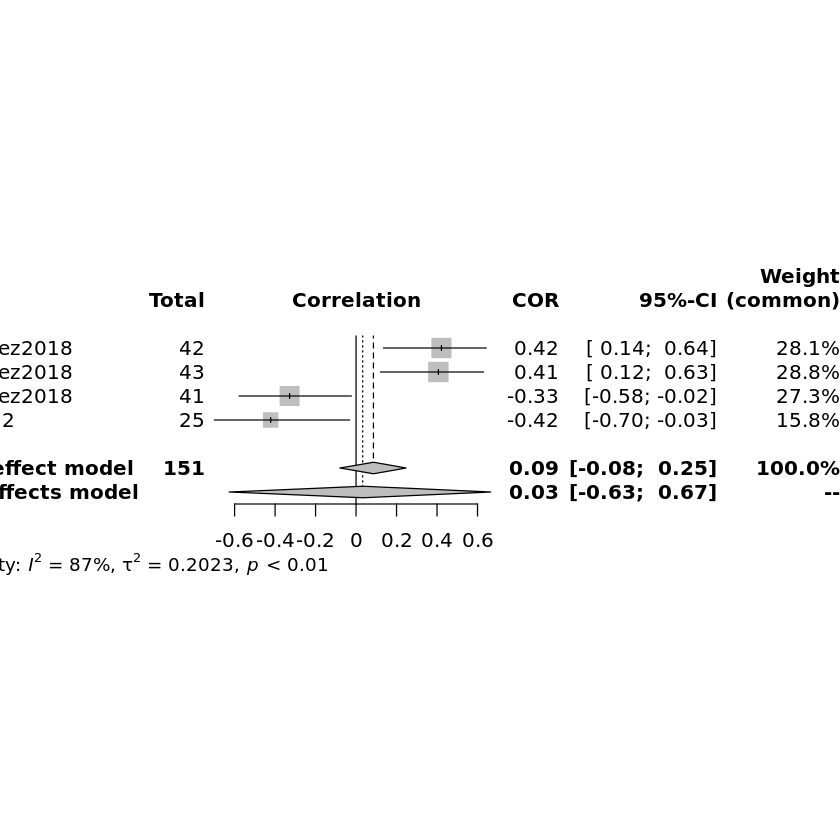

In [5]:
### ### META-ANALYSYS CODE ##################

#First, we need to calculate coefficients of correlation



#load packages-Don't think we need all this packages, but i don't remember
#what particular functions belong to what package 

library (meta)
library (esc)
library (dplyr)

#estimating coefficients of correlation
# names (MetaAnalysis_Data)
#extracting values when there is p-values and t-values
#remove row with Paredes data because statistics value is based on a chisquare
MetaAnalysis_subsetPerez <-MetaAnalysis_Data[-c(4), ] 


#now we can calculate correlations (es column - these values are also called the r values) based on P-values and Sample size 

EffectSizes_Perez<-effect_sizes(MetaAnalysis_subsetPerez, p = p.value, totaln = Sample_size, study = Study, fun = "esc_t", es.type="r")
EffectSizes_Perez

# now we calculate r values for paredes 

MetaAnalysis_subsetParedes <-MetaAnalysis_Data[c(4), ] 
#names(MetaAnalysis_subsetParedes)

#extracting data when there is chi-square values
EffectSizes_Paredes<-effect_sizes(MetaAnalysis_subsetParedes, p = p.value, totaln = Sample_size,
                    study = Study, fun = "chisq", es.type="r")
EffectSizes_Paredes
# removing unnecesary columns from the dataframe
EffectSizes_Paredes2 = subset(EffectSizes_Paredes, select = -c(fishers.z,ci.lo.z,ci.hi.z))

#merge datasets
#names (EffectSizes_Perez)
#names (EffectSizes_Paredes)
CoefficientsCorrelation_Data <-rbind(EffectSizes_Perez, EffectSizes_Paredes2)

#all r values are positive, so we need to create a variable to indicate the direction
#add column with direction and an "es2" column, which is the coefficient of correlation values with the direction attached
direction_metaanalysis <- c(1, 1, -1, -1)
CoefficientsCorrelation_Data["Direction"] <- direction_metaanalysis
#names(CoefficientsCorrelation_Data)
CoefficientsCorrelation_Data2 <- mutate (CoefficientsCorrelation_Data, es2=es*Direction)

# calculate overall effect size 

m.cor <- metacor(cor = es2, 
                 n = sample.size,
                 studlab = study,
                 data = CoefficientsCorrelation_Data2,
                 method.tau = "REML",
                 hakn = TRUE,
                 title = "Mini Meta-analysis")
summary(m.cor)
#interpreting the summary output: We want to focus on the output of the "Random effects model". This is the more conservative model (compared to the fixed effects model) as it considers studies as a random effect (i.e., we expect more variability between observations from different studies than observations within the same study). The COR value is the overall effect size (overall coefficient of correlation). Then you have confidence interval values; when these overlap zero we have a non-significant effect, which here is also confirmed by the p-value. This is the most basic way to run a meta-analysis. If we were working with a real data set we would also, weight the estimated values by sample size or variability, we would also standardize the coefficients of correlation. However, this is not really needed here because this is just a proof-of-concept synthesis to demonstrate how the ORKG can support/facilitate/streamline synthesis research. We are not expecting a meaningful ecological interpretation from the meta-analysis output.


forest(m.cor)
# overall, analysis indicate there is no significant
#correlation between pest abundance/incidence and landscape complexity